# Churn modeling

## Miguel Ángel Canela, IESE Business School

******

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favour of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

In this example, I develop a churn model, based on a **logistic regression equation**, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is based on a random sample of 5,000 customers whose accounts were still alive by September 30, and have been monitored during the fourth quarter. 968 of those customers churned during the fourth quarter, a **churning rate** of 19.4%.

The variables included in the data set are: 

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `datagb`, the gigabytes available according to the data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK 0844 or 0871 numbers, are often helplines for organizations like banks, insurance companies, utilities and charities. 

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable. 

### Importing the data

The data come in a CSV file, which I import with the Pandas function `read_csv`. I include here an additional argument, `index_col=0`, for the first column to be used as the **index**.

In [1]:
import pandas as pd
fname = 'https://raw.githubusercontent.com/mcanela-iese/ML_Course/master/Data/' \
    'churn.csv'
df = pd.read_csv(fname, index_col=0)

In [2]:
df.index[0:10]

Index(['409-8978', '444-7077', '401-9132', '409-2971', '431-5175', '375-5486',
       '400-7151', '390-2169', '420-8569', '446-7327'],
      dtype='object', name='id')

### Checking redundancy

Note that `datagb` takes value `0` when `dataplan` takes value `0`, so we have redundancy in the data, as illustrated by the crosstabulation below. I will leave `dataplan` aside, as it is the same as one of the dummies that I will generate in order to enter `datagb` in the equation.

In [3]:
pd.crosstab(df['datagb'], df['dataplan'])

dataplan,0,1
datagb,,
0,3449,0
1.5G,0,522
100M,0,74
1G,0,410
250M,0,168
2G,0,86
500M,0,291


### Logistic regression model

I am going to use a classifier based on a **logistic regression** equation for churn prediction. I first specify the **target vector**.

In [4]:
y = df['churn']

Since scikit-learn can only deal with numeric features, to build the features matrix I have to replace `datagb` by a collection of dummies. These dummies can be generated with the Pandas function `get_dummies`. 

In [5]:
X1 = pd.get_dummies(df['datagb'])
X1.head()

,0,1.5G,100M,1G,250M,2G,500M
id,,,,,,,
409-8978,1,0,0,0,0,0,0
444-7077,1,0,0,0,0,0,0
401-9132,0,1,0,0,0,0,0
409-2971,1,0,0,0,0,0,0
431-5175,0,1,0,0,0,0,0


*Note*. If you wish to do the job in scikit-learn, you will find many methods for encoding categorical features in the module `sklearn.preprocessing`.

Next, I join this set of dummies to a data frame formed by the rest of the columns, with the Pandas function `concat` (this can also be done with the Numpy function `concatenate`, after converting `X1` and `X2` to arrays). The argument `axis=1` specifies that the two data frames are joined columnwise.

In [6]:
X2 = df[['aclength', 'intplan', 'ommin', 'omcall',
  'otmin', 'otcall', 'ngmin', 'ngcall', 'imin', 'icall', 'cuscall']]
X = pd.concat([X1, X2], axis=1)
X.head()

,0,1.5G,100M,1G,250M,2G,500M,aclength,intplan,ommin,omcall,otmin,otcall,ngmin,ngcall,imin,icall,cuscall
id,,,,,,,,,,,,,,,,,,
409-8978,1,0,0,0,0,0,0,77,0,80.8,70,165.9,67,18.6,6,9.5,4,1
444-7077,1,0,0,0,0,0,0,105,0,131.8,66,131.7,105,5.1,6,6.7,2,0
401-9132,0,1,0,0,0,0,0,121,0,212.1,57,195.4,140,14.9,14,28.6,8,1
409-2971,1,0,0,0,0,0,0,115,0,186.1,64,230.9,125,26.5,16,9.9,4,1
431-5175,0,1,0,0,0,0,0,133,0,166.5,61,176.0,74,36.1,11,5.3,2,1


scikit-learn has a module called `linear_model`, with various regression and classification methods. I load only the method `LogisticRegression`, which I name `logclf`, to make it shorter. I use the default arguments, but look at the warning, discussed below.

In [7]:
from sklearn import linear_model
logclf = linear_model.LogisticRegression()
logclf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

I got a **warning** from Python this time. Note that a warning is not the same as an **error message**. The error message stops the execution of your command, but the warning does not. What happened? That sikit-learn people are changing the rules for this method. You will be soon expected to specify the optimization algorithm (the solver) that is used to obtain the optimal solution for the coefficients of the logistic regression equation. LBFGS is a variant of the **BFGS** method, which is a favorite of scientific programming, and the default in many places.

*Note*. One of the dummies associated to `datagb` is superfluous, because it is linearly related to the other dummies (the sum of the dummies is equal to 1). You do not have to worry, Python takes care of that.

### Predictive scores

The method `predict`, which I have already used for the class `LinearRegression`, returns **class labels** (1/0). Since in this example I am interested in discussing the predictive scores, I leave this for the homework. To get the **scores**, I use `predict_proba`, which returns an array with two columns, containing a score for class 1 and a score for class 0, summing 1.

In [8]:
scores = logclf.predict_proba(X)
scores[0:5, 0:5]

array([[0.94830219, 0.05169781],
       [0.96644987, 0.03355013],
       [0.74421866, 0.25578134],
       [0.87147019, 0.12852981],
       [0.92741928, 0.07258072]])

I incorporate the second column of `scores` to the current data frame, so I can manage this easily with Pandas. This column contains the scores for the positive category (in alphabetical order 0 comes first and 1 comes second).

In [9]:
df['churn_score'] = scores[:, 1]

The predictive score can be interpreted as the propensity to churn. Reading it so, it would be natural to set the **cutoff** for classification at 0.5 (that is how `predict` gets the class labels). 

Anyway, I start with cutoff 0.5. The predicted class is obtained as

In [10]:
df['churn_pred'] = (df['churn_score'] > 0.5).astype(int) 

Note that the expression in parenthesis creates a boolean series, which I have converted to a dummy. The last three columns of the data frame look like:

In [11]:
df.iloc[:, 13:].head(10)

,churn,churn_score,churn_pred
id,,,
409-8978,0,0.051698,0
444-7077,0,0.033550,0
401-9132,0,0.255781,0
409-2971,0,0.128530,0
431-5175,0,0.072581,0
375-5486,1,0.088738,0
400-7151,1,0.552494,1
390-2169,0,0.115307,0
420-8569,1,0.053947,0


### Confusion matrix

The **confusion matrix** informs on the coincidence between the columns `churn` and `churn_pred`. There is a way of calculating this matrix with scikit-learn, but I leave this for the homework. Let me use the `pandas` function `crosstab`.  Note that the vector first specified comes in the rows. 

In [12]:
conf1 = pd.crosstab(df['churn_pred'], df['churn'])
conf1

churn,0,1
churn_pred,,
0,3894,661
1,138,307


The **true positive (TP) rate** and the **false positive (FP) rate** allow us to be more specific. Here, the FP rate is pretty low, but the TP rate shows that a cutoff so high does not capture enough potential churners. 

In [13]:
tp1 = conf1.iloc[1, 1]/(conf1.iloc[0, 1] + conf1.iloc[1, 1])
tp1.round(3)

0.317

In [14]:
fp1 = conf1.iloc[1, 0]/(conf1.iloc[0, 0] + conf1.iloc[1, 0])
fp1.round(3)

0.034

### Changing the cutoff

Taking a look at the distribution of the scores could have told us in advance what we were going to find. In particular, examining the distribution separately in the churners and the non-churners. I start with the churners (Figure 1). 

In [15]:
import matplotlib.pyplot as plt

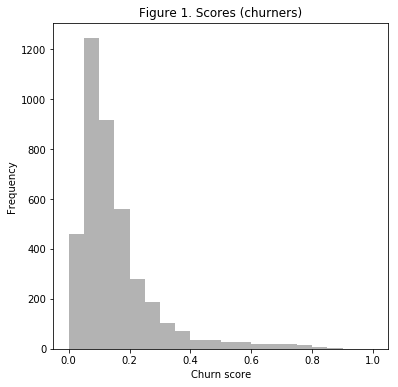

In [16]:
df['churn_score'][df['churn']==0].plot.hist(bins=20, range=(0,1), \
    title='Figure 1. Scores (churners)', figsize=(6,6), color='0.7')
plt.xlabel('Churn score')
plt.show()

Note that I have controlled the **number of bins** with the arguments `bins=20`, `range=(0,1)`. This creates a partition into intervals of length 0.05, which works fine here. I repeat the exercise for the non-churners (Figure 2).

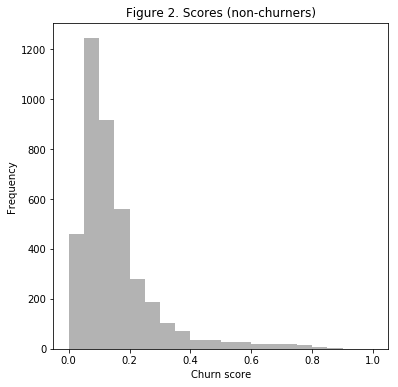

In [17]:
df['churn_score'][df['churn']==0].plot.hist(bins=20, range=(0,1), 
    title='Figure 2. Scores (non-churners)',figsize=(6,6), color='0.7')
plt.xlabel('Churn score')
plt.show()

Let us look at the above histograms. In Figure 1, classifying as churners only those customers with score higher than 0.5 will leave out more than one half of the actual churners, which, from a business perspective, looks like a poor job. In compensation, we see in Figure 2 than the vast majority of the non-churners will be classified in the right way. This is, indeed, what the confusion matrix shows.

I set now the cutoff at 0.2. Again, we can guess what will happen from the histograms, but the TP and FP rates allow us to be more specific. 

In [18]:
df['churn_pred'] = (df['churn_score'] > 0.2).astype(int) 
conf2 = pd.crosstab(df['churn_pred'], df['churn'])
conf2

churn,0,1
churn_pred,,
0,3180,344
1,852,624


In [19]:
tp2 = conf2.iloc[1, 1]/(conf2.iloc[0, 1] + conf2.iloc[1, 1])
tp2.round(3)

0.645

In [20]:
fp2 = conf2.iloc[1, 0]/(conf2.iloc[0, 0] + conf2.iloc[1, 0])
fp2.round(3)

0.211

Now the results look more acceptable. Nevertheless, in a business application, a **cost/benefit analysis** would be the right way to decide how useful this model could be. I leave this for the homework.

### Source of the data

MA Canela, I Alegre & A Ibarra (2019), *Quantitative Methods for Management --- A Practical Approach*, Springer.